In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.arima.model import ARIMA

In [2]:
import os

# Directory path
directory = "aex_data/"

# List files and directories in the directory
files_and_directories = os.listdir(directory)

# Print the list
print("Files and directories in", directory, ":")
for item in files_and_directories:
    print(item)


Files and directories in aex_data/ :
.ipynb_checkpoints
ABN_data_2022-01-01_2022-12-31.csv
ADYEN_data_2022-01-01_2022-12-31.csv
AD_data_2022-01-01_2022-12-31.csv
AGN_data_2022-01-01_2022-12-31.csv
AKZA_data_2022-01-01_2022-12-31.csv
ASML_data_2022-01-01_2022-12-31.csv
ASM_data_2022-01-01_2022-12-31.csv
ASRNL_data_2022-01-01_2022-12-31.csv
BESI_data_2022-01-01_2022-12-31.csv
HEIA_data_2022-01-01_2022-12-31.csv
IMCD_data_2022-01-01_2022-12-31.csv
INGA_data_2022-01-01_2022-12-31.csv
KPN_data_2022-01-01_2022-12-31.csv
MT_data_2022-01-01_2022-12-31.csv
NN_data_2022-01-01_2022-12-31.csv
PHIA_data_2022-01-01_2022-12-31.csv
PRX_data_2022-01-01_2022-12-31.csv
RAND_data_2022-01-01_2022-12-31.csv
REN_data_2022-01-01_2022-12-31.csv
UMG_data_2022-01-01_2022-12-31.csv
UNA_data_2022-01-01_2022-12-31.csv
WKL_data_2022-01-01_2022-12-31.csv


In [3]:
df_ABN = pd.read_csv("aex_data/ABN_data_2022-01-01_2022-12-31.csv")

In [4]:
df_ABN

,Open,High,Low,Close,Adj Close,Volume
0,12.986,13.160,12.962,13.132,11.097252,2182042
1,13.300,13.910,13.240,13.848,11.702311,4522246
2,13.910,14.346,13.886,14.092,11.908505,3625228
3,14.000,14.262,13.930,14.130,11.940617,2792021
4,14.220,14.220,13.934,14.100,11.915266,3078482
...,...,...,...,...,...,...
252,13.160,13.240,13.125,13.215,12.096783,1342483
253,13.235,13.325,13.155,13.190,12.073897,881020
254,13.210,13.210,13.035,13.060,11.954899,1096527
255,13.000,13.135,12.850,13.080,11.973206,1250228


- Trading Days: Stock markets are not open on weekends and holidays, so there are typically fewer than 365 trading days in a year. In 2022, for example, there were approximately 252 trading days on the Amsterdam Stock Exchange.

- Data Availability: Sometimes data providers like Yahoo Finance may not have data available for all trading days, especially for older data or for less liquid stocks.

- Corporate Actions: There might be corporate actions such as stock splits, dividends, or other adjustments that could affect the number of rows in the dataset. These actions can lead to gaps in the data.

- Data Quality: Occasionally, there may be errors or missing data in the dataset, leading to fewer rows than expected.

In [5]:
class stockPredictor:
    def __init__(self, stock_data):
        self.stock_data = stock_data
        
    def describe_stock_data(self):
        print(self.stock_data.head(3))
        print(self.stock_data.shape)
        print(self.stock_data.dtypes)
        print(self.stock_data.dtypes.unique())
    
    def describe_columns(self):
        print("""
        Open - Opening price of the stock at the beginning of the trading day
        High - Highest value that the stock reached on that day
        Low - Lowest value that the stock reached on that day
        Close - Closing value that the stock reached on that day
        Adj Close - The adjusted closing price is the closing price of the stock adjusted
        to include any corporate actions that occurred before the next trading day's open.
        Volume - Number of stocks traded that day
        """)
    
    def timeSeriesArima(self):
        # Load stock market data 

        # Assuming 'Close' prices are in a column named 'Close'
        # For simplicity, we'll work with a single stock's closing prices

        stock_prices_close = self.stock_data["Close"]

        # Plot the time series data
        plt.plot(stock_prices_close)
        plt.title('Stock Prices Over Time')
        plt.xlabel('Time')
        plt.ylabel('Price')
        plt.show()

        # Fit ARIMA model
        model = ARIMA(stock_prices_close, order=(1, 1, 1))  # Example order, replace with appropriate values
        model_fit = model.fit()

        # Summary of the model
        print(model_fit.summary())

        # Forecast future values
        forecast = model_fit.forecast(steps=5)  # Example steps for forecasting 5 future time points
        print("Forecasted values:", forecast)


In [6]:
sp_ABN = stockPredictor(df_ABN)
sp_ABN.describe_stock_data()

     Open    High     Low   Close  Adj Close   Volume
0  12.986  13.160  12.962  13.132  11.097252  2182042
1  13.300  13.910  13.240  13.848  11.702311  4522246
2  13.910  14.346  13.886  14.092  11.908505  3625228
(257, 6)
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object
[dtype('float64') dtype('int64')]


In [7]:
sp_ABN.describe_columns()


        Open - Opening price of the stock at the beginning of the trading day
        High - Highest value that the stock reached on that day
        Low - Lowest value that the stock reached on that day
        Close - Closing value that the stock reached on that day
        Adj Close - The adjusted closing price is the closing price of the stock adjusted
        to include any corporate actions that occurred before the next trading day's open.
        Volume - Number of stocks traded that day
        


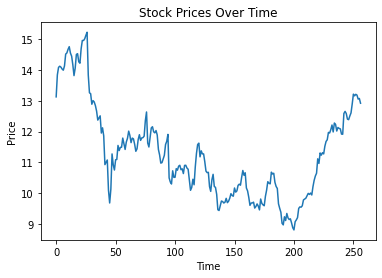

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  257
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -34.425
Date:                Wed, 10 Apr 2024   AIC                             74.849
Time:                        20:47:07   BIC                             85.485
Sample:                             0   HQIC                            79.127
                                - 257                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5231      0.264     -1.982      0.047      -1.040      -0.006
ma.L1          0.6723      0.232      2.901      0.004       0.218       1.127
sigma2         0.0766      0.003     23.043      0.0

In [8]:
sp_ABN.timeSeriesArima()